# Linear Regression code for on a synthetic complex-valued sinusoidal dataset with added complex Gaussian noise, and evaluate how well the model estimates the true parameters.
## 🎯 Objective
Perform **linear regression** on a **synthetic complex-valued sinusoidal dataset** with added **complex Gaussian noise**, and evaluate how well the model estimates the true parameters.



## 🧩 Problem Description
We consider a **complex sinusoidal signal** defined as:

\[
y(t) = \beta_0 + \beta_1 e^{j\omega t} + \epsilon(t)
\]

where:  
- \(\beta_0\) → complex bias (intercept)  
- \(\beta_1\) → complex amplitude (slope)  
- \(\omega\) → angular frequency  
- \(\epsilon(t)\) → complex Gaussian noise  

The goal is to estimate \(\beta_0\) and \(\beta_1\) from noisy observations.


## Importing Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 🧮 Tasks

### 1. Data Generation
- Generate \(N\) samples for \(t \in [0, 2\pi]\).  
- Create the clean signal \(y_{\text{true}}(t)\).  
- Add complex Gaussian noise to form \(y_{\text{noisy}}(t)\).

In [12]:
# ---------------------------------------------------------------
# 1. Generate synthetic complex sinusoidal dataset
# ---------------------------------------------------------------
np.random.seed(42)

N = 200                       # number of samples
t = np.linspace(0, 2 * np.pi, N)
omega = 3.0                   # frequency multiplier
amp = 1.2 + 0.5j              # complex amplitude
bias = 0.3 - 0.2j             # complex bias

# true signal
x = np.exp(1j * omega * t)
y_true = bias + amp * x

# complex Gaussian noise
sigma = 0.3
noise = (np.random.normal(scale=sigma, size=N) +
         1j * np.random.normal(scale=sigma, size=N))
y_noisy = y_true + noise

### 2. Model Construction
Use a **linear model** of the form:

\[
y = X\beta + \epsilon
\]

where  
\[
X = [1, \ e^{j\omega t}]
\]

In [13]:
# ---------------------------------------------------------------
# 2. Build design matrix
# ---------------------------------------------------------------
X = np.vstack([np.ones(N, dtype=complex), x]).T  # shape (N, 2)


### 3. Parameter Estimation

Estimate the complex coefficients \( \beta = [\beta_0, \beta_1]^T \) using two approaches:

#### (a) Complex Least Squares
\[
\hat{\beta} = (X^{H} X)^{-1} X^{H} y
\]

#### (b) Real-Stacked Least Squares
Separate real and imaginary parts and form an equivalent real-valued system:

\[
\begin{aligned}
\begin{bmatrix}
\operatorname{Re}(y) \\
\operatorname{Im}(y)
\end{bmatrix}
&=
\begin{bmatrix}
\operatorname{Re}(X) & -\operatorname{Im}(X) \\
\operatorname{Im}(X) & \operatorname{Re}(X)
\end{bmatrix}
\begin{bmatrix}
\operatorname{Re}(\beta) \\
\operatorname{Im}(\beta)
\end{bmatrix}
\end{aligned}
\]


In [14]:
# ---------------------------------------------------------------
# 3. Complex least squares
# ---------------------------------------------------------------
X_H = X.conj().T
beta_complex = np.linalg.inv(X_H @ X) @ (X_H @ y_noisy)
y_pred_complex_ls = X @ beta_complex

### 4. Evaluation
- Compute the **Mean Squared Error (MSE)** between predicted and true signals.  
- Compare results from both methods.  

\[
\mathrm{MSE} = \frac{1}{N} \sum_{i=1}^{N} \left| y_{\mathrm{true}}(i) - y_{\mathrm{pred}}(i) \right|^2
\]

In [15]:
# ---------------------------------------------------------------
# 4. Real-stacked least squares
# ---------------------------------------------------------------
def stack_real_system(Xc, yc):
    """Convert complex linear system to real-valued form."""
    N, p = Xc.shape
    XR, XI = Xc.real, Xc.imag
    top = np.hstack([XR, -XI])
    bottom = np.hstack([XI, XR])
    A = np.vstack([top, bottom])  # (2N, 2p)
    y_stack = np.hstack([yc.real, yc.imag])
    return A, y_stack

A, y_stack = stack_real_system(X, y_noisy)
theta, *_ = np.linalg.lstsq(A, y_stack, rcond=None)
p = X.shape[1]
beta_realstack = theta[:p] + 1j * theta[p:]
y_pred_realstack = X @ beta_realstack

### 5. Visualization
Plot:
- Real and imaginary parts of:
  - True signal  
  - Noisy signal  
  - Predicted signal (from both methods)
- Absolute error over time.


In [16]:
# ---------------------------------------------------------------
# 5. Evaluation
# ---------------------------------------------------------------
def complex_mse(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) ** 2)

mse_noisy = complex_mse(y_true, y_noisy)
mse_complex = complex_mse(y_true, y_pred_complex_ls)
mse_realstack = complex_mse(y_true, y_pred_realstack)

### 6. Output
- Display estimated complex coefficients (\(\hat{\beta_0}, \hat{\beta_1}\)).  
- Show MSE values for each method.  
- Present a sample of complex data (first few rows).

In [17]:
# ---------------------------------------------------------------
# 6. Print results
# ---------------------------------------------------------------
print("\n=== Complex Linear Regression on Synthetic Sinusoid ===")
print(f"True bias = {bias}, amplitude = {amp}")
print(f"Estimated (Complex LS): {beta_complex}")
print(f"Estimated (Real-stacked LS): {beta_realstack}")
print()
print(f"MSE (noisy vs true): {mse_noisy:.6f}")
print(f"MSE (Complex LS vs true): {mse_complex:.6f}")
print(f"MSE (Real-stacked LS vs true): {mse_realstack:.6f}")


=== Complex Linear Regression on Synthetic Sinusoid ===
True bias = (0.3-0.2j), amplitude = (1.2+0.5j)
Estimated (Complex LS): [0.28779161-0.17427193j 1.19541976+0.50647787j]
Estimated (Real-stacked LS): [0.28779161-0.17427193j 1.19541976+0.50647787j]

MSE (noisy vs true): 0.165670
MSE (Complex LS vs true): 0.000876
MSE (Real-stacked LS vs true): 0.000876


### 📊 Example Outputs
- Estimated coefficients (Complex LS & Real-stacked LS)  
- MSE values comparison  
- Plots showing:
  - Real and Imaginary part fitting  
  - Absolute error vs time

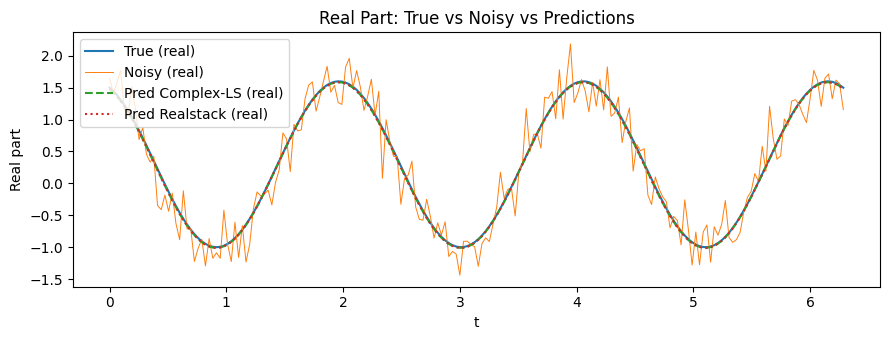

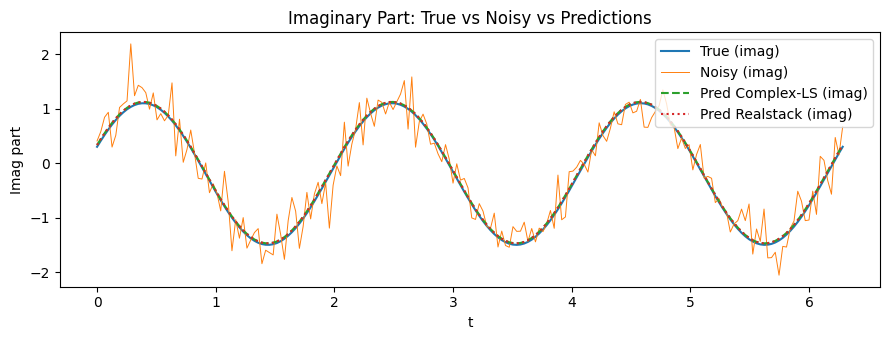

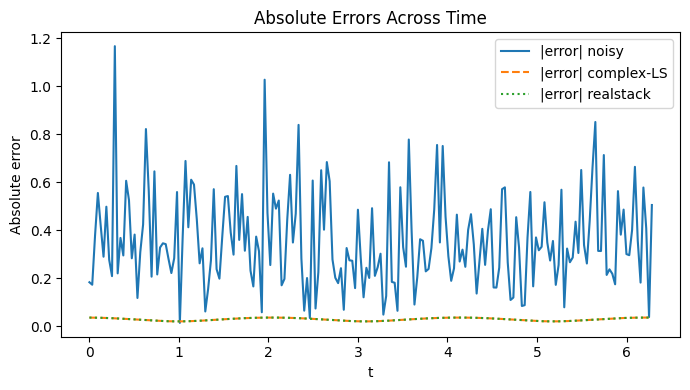

In [18]:
# ---------------------------------------------------------------
# 7. Visualization
# ---------------------------------------------------------------
plt.figure(figsize=(9, 3.5))
plt.plot(t, y_true.real, label="True (real)")
plt.plot(t, y_noisy.real, label="Noisy (real)", linewidth=0.7)
plt.plot(t, y_pred_complex_ls.real, '--', label="Pred Complex-LS (real)")
plt.plot(t, y_pred_realstack.real, ':', label="Pred Realstack (real)")
plt.legend()
plt.title("Real Part: True vs Noisy vs Predictions")
plt.xlabel("t")
plt.ylabel("Real part")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 3.5))
plt.plot(t, y_true.imag, label="True (imag)")
plt.plot(t, y_noisy.imag, label="Noisy (imag)", linewidth=0.7)
plt.plot(t, y_pred_complex_ls.imag, '--', label="Pred Complex-LS (imag)")
plt.plot(t, y_pred_realstack.imag, ':', label="Pred Realstack (imag)")
plt.legend()
plt.title("Imaginary Part: True vs Noisy vs Predictions")
plt.xlabel("t")
plt.ylabel("Imag part")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(t, np.abs(y_true - y_noisy), label="|error| noisy")
plt.plot(t, np.abs(y_true - y_pred_complex_ls), '--', label="|error| complex-LS")
plt.plot(t, np.abs(y_true - y_pred_realstack), ':', label="|error| realstack")
plt.legend()
plt.title("Absolute Errors Across Time")
plt.xlabel("t")
plt.ylabel("Absolute error")
plt.tight_layout()
plt.show()


## ✅ Expected Outcome
- Both regression methods produce nearly identical results.  
- Estimated coefficients are close to the true parameters.  
- The predicted complex signal approximates the clean sinusoid accurately.  
- Visualization demonstrates effective denoising and phase preservation.

In [19]:
# ---------------------------------------------------------------
# 8. Optional: Display first few samples
# ---------------------------------------------------------------
df_sample = pd.DataFrame({
    "t": t[:10],
    "y_true": y_true[:10],
    "y_noisy": y_noisy[:10],
    "pred_complex_ls": y_pred_complex_ls[:10],
    "pred_realstack": y_pred_realstack[:10]
})
print("\nSample data:\n", df_sample.head())


Sample data:
           t              y_true             y_noisy     pred_complex_ls  \
0  0.000000  1.500000+0.300000j  1.649014+0.407336j  1.483211+0.332206j   
1  0.031574  1.447331+0.411254j  1.405852+0.579490j  1.429950+0.442998j   
2  0.063148  1.384375+0.517029j  1.578682+0.841944j  1.366449+0.548256j   
3  0.094721  1.311698+0.616374j  1.768607+0.932515j  1.293277+0.647036j   
4  0.126295  1.229950+0.708401j  1.159704+0.295100j  1.211090+0.738453j   

       pred_realstack  
0  1.483211+0.332206j  
1  1.429950+0.442998j  
2  1.366449+0.548256j  
3  1.293277+0.647036j  
4  1.211090+0.738453j  
